# United Kingdom "community population" COVID-19 infection percentage

references: <https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/conditionsanddiseases/bulletins/coronaviruscovid19infectionsurveypilot/previousReleases>

In these ONS reports, an estimate of the number of current COVID-19 infections within the "community population" is expressed. This term is stated to refer to private residential households and excludes those in hospitals, care homes and/or other institutional settings. The measurements are stated to be of testing positive for SARS-CoV-2, with or without having symptoms, on a swab taken from the nose and throat.

## some caveats

Confidence intervals, estimates of which are available in the reports, are not included. The mean of the time interval of reported measurements has been taken for plotting purposes. The timeframes of the measurements differ by region. For example, Scotland measurements were reported first in October 2020.

In [1]:
import json
import pickle
from uuid import uuid4
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelcolor'] = (1, 1, 1, 0)
pd.set_option("display.max_rows"   , 1000)
pd.set_option("display.max_columns", 1000)
sns.set_palette('husl')
sns.set(style='ticks')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [13, 6]
sns.set()

In [3]:
df = pd.DataFrame(
    [
        ['2020-04-27', '2020-05-10', None, 'England'         ,         0.27],
        ['2020-05-25', '2020-06-07', None, 'England'         ,         0.06],
        ['2020-06-08', '2020-06-21', None, 'England'         , 100*(1/1100)],
        ['2020-07-13', '2020-07-19', None, 'England'         , 100*(1/2000)],
        ['2020-08-14', '2020-08-20', None, 'England'         , 100*(1/1900)],           
        ['2020-08-14', '2020-08-20', None, 'Wales'           , 100*(1/2800)],
        ['2020-09-04', '2020-09-10', None, 'England'         , 100*(1/900) ],
        ['2020-09-04', '2020-09-10', None, 'Wales'           , 100*(1/2000)],
        ['2020-09-13', '2020-09-19', None, 'England'         , 100*(1/500) ],
        ['2020-09-06', '2020-09-16', None, 'Northern_Ireland', 100*(1/300) ], # first reporting Northern Ireland
        ['2020-09-13', '2020-09-19', None, 'Wales'           , 100*(1/300) ],
        ['2020-09-18', '2020-09-24', None, 'England'         , 100*(1/500) ],
        ['2020-09-11', '2020-09-24', None, 'Northern_Ireland', 100*(1/400) ],
        ['2020-09-18', '2020-09-24', None, 'Wales'           , 100*(1/500) ],
        ['2020-09-25', '2020-10-01', None, 'England'         , 100*(1/240) ],
        ['2020-09-18', '2020-10-01', None, 'Northern_Ireland', 100*(1/500) ],
        ['2020-09-25', '2020-10-01', None, 'Wales'           , 100*(1/500) ],
        ['2020-10-10', '2020-10-16', None, 'England'         , 100*(1/130) ],
        ['2020-10-03', '2020-10-16', None, 'Northern_Ireland', 100*(1/100) ],
        ['2020-10-03', '2020-10-16', None, 'Scotland'        , 100*(1/180) ], # first reporting of Scotland
        ['2020-10-10', '2020-10-16', None, 'Wales'           , 100*(1/180) ],
        ['2020-10-17', '2020-10-23', None, 'England'         , 100*(1/100) ],
        ['2020-10-17', '2020-10-23', None, 'Northern_Ireland', 100*(1/80)  ],
        ['2020-10-10', '2020-10-23', None, 'Scotland'        , 100*(1/140) ],
        ['2020-10-17', '2020-10-23', None, 'Wales'           , 100*(1/120) ],
        ['2020-10-25', '2020-10-31', None, 'England'         , 100*(1/90)  ],
        ['2020-10-25', '2020-10-31', None, 'Northern_Ireland', 100*(1/75)  ],
        ['2020-10-25', '2020-10-31', None, 'Scotland'        , 100*(1/110) ],
        ['2020-10-25', '2020-10-31', None, 'Wales'           , 100*(1/110) ],
        ['2020-10-31', '2020-11-06', None, 'England'         , 100*(1/85)  ],
        ['2020-10-31', '2020-11-06', None, 'Northern_Ireland', 100*(1/85)  ],
        ['2020-10-31', '2020-11-06', None, 'Scotland'        , 100*(1/135) ],
        ['2020-10-31', '2020-11-06', None, 'Wales'           , 100*(1/165) ],
        ['2020-11-08', '2020-11-14', None, 'England'         , 100*(1/80)  ],
        ['2020-11-08', '2020-11-14', None, 'Northern_Ireland', 100*(1/135) ],
        ['2020-11-08', '2020-11-14', None, 'Scotland'        , 100*(1/155) ],
        ['2020-11-08', '2020-11-14', None, 'Wales'           , 100*(1/165) ],
        ['2020-11-15', '2020-11-21', None, 'England'         , 100*(1/85)  ],
        ['2020-11-15', '2020-11-21', None, 'Northern_Ireland', 100*(1/145) ],
        ['2020-11-15', '2020-11-21', None, 'Scotland'        , 100*(1/115) ],
        ['2020-11-15', '2020-11-21', None, 'Wales'           , 100*(1/185) ],
        ['2020-11-22', '2020-11-28', None, 'England'         , 100*(1/105) ],
        ['2020-11-22', '2020-11-28', None, 'Northern_Ireland', 100*(1/190) ],
        ['2020-11-22', '2020-11-28', None, 'Scotland'        , 100*(1/130) ],
        ['2020-11-22', '2020-11-28', None, 'Wales'           , 100*(1/170) ],
        ['2020-11-29', '2020-12-05', None, 'England'         , 100*(1/115) ],
        ['2020-11-29', '2020-12-05', None, 'Northern_Ireland', 100*(1/235) ],
        ['2020-11-29', '2020-12-05', None, 'Scotland'        , 100*(1/120) ],
        ['2020-11-29', '2020-12-05', None, 'Wales'           , 100*(1/120) ],
        ['2020-12-06', '2020-12-12', None, 'England'         , 100*(1/95)  ],
        ['2020-12-06', '2020-12-12', None, 'Northern_Ireland', 100*(1/215) ],
        ['2020-12-06', '2020-12-12', None, 'Scotland'        , 100*(1/100) ],
        ['2020-12-06', '2020-12-12', None, 'Wales'           , 100*(1/90)  ],
        ['2020-12-12', '2020-12-18', None, 'England'         , 100*(1/85)  ],
        ['2020-12-12', '2020-12-18', None, 'Northern_Ireland', 100*(1/180) ],
        ['2020-12-12', '2020-12-18', None, 'Scotland'        , 100*(1/140) ],
        ['2020-12-12', '2020-12-18', None, 'Wales'           , 100*(1/60)  ],
        ['2020-12-27', '2021-01-02', None, 'England'         , 100*(1/50)  ],
        ['2020-12-27', '2021-01-02', None, 'Northern_Ireland', 100*(1/200) ],
        ['2020-12-27', '2021-01-02', None, 'Scotland'        , 100*(1/115) ],
        ['2020-12-27', '2021-01-02', None, 'Wales'           , 100*(1/70)  ],
        ['2021-01-03', '2021-01-16', None, 'England'         , 100*(1/55)  ],
        ['2021-01-03', '2021-01-16', None, 'Northern_Ireland', 100*(1/60)  ],
        ['2021-01-03', '2021-01-16', None, 'Scotland'        , 100*(1/100) ],
        ['2021-01-03', '2021-01-16', None, 'Wales'           , 100*(1/70)  ],
        ['2021-01-17', '2021-01-23', None, 'England'         , 100*(1/55)  ],
        ['2021-01-17', '2021-01-23', None, 'Northern_Ireland', 100*(1/50)  ],
        ['2021-01-17', '2021-01-23', None, 'Scotland'        , 100*(1/110) ],
        ['2021-01-17', '2021-01-23', None, 'Wales'           , 100*(1/70)  ],
        ['2021-01-24', '2021-02-06', None, 'England'         , 100*(1/80)  ],
        ['2021-01-24', '2021-02-06', None, 'Northern_Ireland', 100*(1/75)  ],
        ['2021-01-24', '2021-02-06', None, 'Scotland'        , 100*(1/150) ],
        ['2021-01-24', '2021-02-06', None, 'Wales'           , 100*(1/85)  ],
        ['2021-02-07', '2021-02-12', None, 'England'         , 100*(1/115) ],
        ['2021-02-07', '2021-02-12', None, 'Northern_Ireland', 100*(1/105) ],
        ['2021-02-07', '2021-02-12', None, 'Scotland'        , 100*(1/180) ],
        ['2021-02-07', '2021-02-12', None, 'Wales'           , 100*(1/125) ],
        ['2021-02-13', '2021-02-19', None, 'England'         , 100*(1/145) ],
        ['2021-02-13', '2021-02-19', None, 'Northern_Ireland', 100*(1/195) ],
        ['2021-02-13', '2021-02-19', None, 'Scotland'        , 100*(1/225) ],
        ['2021-02-13', '2021-02-19', None, 'Wales'           , 100*(1/205) ],
        ['2021-02-20', '2021-02-27', None, 'England'         , 100*(1/220) ],
        ['2021-02-20', '2021-02-27', None, 'Northern_Ireland', 100*(1/285) ],
        ['2021-02-20', '2021-02-27', None, 'Scotland'        , 100*(1/335) ],
        ['2021-02-20', '2021-02-27', None, 'Wales'           , 100*(1/285) ],
        ['2021-02-28', '2021-03-06', None, 'England'         , 100*(1/270) ],
        ['2021-02-28', '2021-03-06', None, 'Northern_Ireland', 100*(1/310) ],
        ['2021-02-28', '2021-03-06', None, 'Scotland'        , 100*(1/320) ],
        ['2021-02-28', '2021-03-06', None, 'Wales'           , 100*(1/365) ],
        ['2021-03-07', '2021-03-13', None, 'England'         , 100*(1/340) ],
        ['2021-03-07', '2021-03-13', None, 'Northern_Ireland', 100*(1/315) ],
        ['2021-03-07', '2021-03-13', None, 'Scotland'        , 100*(1/275) ],
        ['2021-03-07', '2021-03-13', None, 'Wales'           , 100*(1/430) ],
        ['2021-03-14', '2021-03-20', None, 'England'         , 100*(1/340) ],
        ['2021-03-14', '2021-03-20', None, 'Northern_Ireland', 100*(1/320) ],
        ['2021-03-14', '2021-03-20', None, 'Scotland'        , 100*(1/240) ],
        ['2021-03-14', '2021-03-20', None, 'Wales'           , 100*(1/450) ],
        ['2021-03-21', '2021-03-27', None, 'England'         , 100*(1/370) ],
        ['2021-03-21', '2021-03-27', None, 'Northern_Ireland', 100*(1/220) ],
        ['2021-03-21', '2021-03-27', None, 'Scotland'        , 100*(1/320) ],
        ['2021-03-21', '2021-03-27', None, 'Wales'           , 100*(1/570) ],
        ['2021-03-28', '2021-04-03', None, 'England'         , 100*(1/340) ],
        ['2021-03-28', '2021-04-03', None, 'Northern_Ireland', 100*(1/300) ],
        ['2021-03-28', '2021-04-03', None, 'Scotland'        , 100*(1/410) ],
        ['2021-03-28', '2021-04-03', None, 'Wales'           , 100*(1/800) ],
        ['2021-04-04', '2021-04-10', None, 'England'         , 100*(1/480) ],
        ['2021-04-04', '2021-04-10', None, 'Northern_Ireland', 100*(1/710) ],
        ['2021-04-04', '2021-04-10', None, 'Scotland'        , 100*(1/500) ],
        ['2021-04-04', '2021-04-10', None, 'Wales'           , 100*(1/920) ],
        ['2021-04-11', '2021-04-16', None, 'England'         , 100*(1/610) ],
        ['2021-04-11', '2021-04-16', None, 'Northern_Ireland', 100*(1/660) ],
        ['2021-04-11', '2021-04-16', None, 'Scotland'        , 100*(1/560) ],
        ['2021-04-11', '2021-04-16', None, 'Wales'           , 100*(1/840) ],
        ['2021-04-17', '2021-04-24', None, 'England'         , 100*(1/1010)],
        ['2021-04-17', '2021-04-24', None, 'Northern_Ireland', 100*(1/940) ],
        ['2021-04-17', '2021-04-24', None, 'Scotland'        , 100*(1/640) ],
        ['2021-04-17', '2021-04-24', None, 'Wales'           , 100*(1/1570)],
        ['2021-04-25', '2021-05-02', None, 'England'         , 100*(1/1180)],
        ['2021-04-25', '2021-05-02', None, 'Northern_Ireland', 100*(1/750) ],
        ['2021-04-25', '2021-05-02', None, 'Scotland'        , 100*(1/760) ],
        ['2021-04-25', '2021-05-02', None, 'Wales'           , 100*(1/2070)],
        ['2021-05-03', '2021-05-08', None, 'England'         , 100*(1/1340)],
        ['2021-05-03', '2021-05-08', None, 'Northern_Ireland', 100*(1/1430)],
        ['2021-05-03', '2021-05-08', None, 'Scotland'        , 100*(1/1250)],
        ['2021-05-03', '2021-05-08', None, 'Wales'           , 100*(1/4230)],
        ['2021-05-04', '2021-05-15', None, 'England'         , 100*(1/1110)],
        ['2021-05-04', '2021-05-15', None, 'Northern_Ireland', 100*(1/1550)],
        ['2021-05-04', '2021-05-15', None, 'Scotland'        , 100*(1/1960)],
        ['2021-05-04', '2021-05-15', None, 'Wales'           , 100*(1/4340)],
        ['2021-05-16', '2021-05-22', None, 'England'         , 100*(1/1120)],
        ['2021-05-16', '2021-05-22', None, 'Northern_Ireland', 100*(1/820) ],
        ['2021-05-16', '2021-05-22', None, 'Scotland'        , 100*(1/630) ],
        ['2021-05-16', '2021-05-22', None, 'Wales'           , 100*(1/3850)],
        ['2021-05-22', '2021-05-29', None, 'England'         , 100*(1/640) ],
        ['2021-05-22', '2021-05-29', None, 'Northern_Ireland', 100*(1/800) ],
        ['2021-05-22', '2021-05-29', None, 'Scotland'        , 100*(1/680) ],
        ['2021-05-22', '2021-05-29', None, 'Wales'           , 100*(1/1050)],
        ['2021-05-30', '2021-06-05', None, 'England'         , 100*(1/560) ],
        ['2021-05-30', '2021-06-05', None, 'Northern_Ireland', 100*(1/700) ],
        ['2021-05-30', '2021-06-05', None, 'Scotland'        , 100*(1/540) ],
        ['2021-05-30', '2021-06-05', None, 'Wales'           , 100*(1/1300)],
        ['2021-06-06', '2021-06-12', None, 'England'         , 100*(1/520) ],
        ['2021-06-06', '2021-06-12', None, 'Northern_Ireland', 100*(1/610) ],
        ['2021-06-06', '2021-06-12', None, 'Scotland'        , 100*(1/600) ],
        ['2021-06-06', '2021-06-12', None, 'Wales'           , 100*(1/1500)],
        ['2021-06-13', '2021-06-19', None, 'England'         , 100*(1/440) ],
        ['2021-06-13', '2021-06-19', None, 'Northern_Ireland', 100*(1/720) ],
        ['2021-06-13', '2021-06-19', None, 'Scotland'        , 100*(1/220) ],
        ['2021-06-13', '2021-06-19', None, 'Wales'           , 100*(1/830) ],

    ],
    columns = [
        'datetime_start',
        'datetime_stop',
        'datetime_mean',
        'region',
        'community_population_estimated_percentage_infected',
    ]
)
df['datetime_start'] = pd.to_datetime(df['datetime_start'])
df['datetime_stop']  = pd.to_datetime(df['datetime_stop'])
df['datetime_mean']  = df['datetime_start']+(df['datetime_stop']-df['datetime_start'])/2

,datetime_start,datetime_stop,datetime_mean,region,community_population_estimated_percentage_infected
0,2020-04-27,2020-05-10,2020-05-03 12:00:00,England,0.270000
1,2020-05-25,2020-06-07,2020-05-31 12:00:00,England,0.060000
2,2020-06-08,2020-06-21,2020-06-14 12:00:00,England,0.090909
3,2020-07-13,2020-07-19,2020-07-16 00:00:00,England,0.050000
4,2020-08-14,2020-08-20,2020-08-17 00:00:00,England,0.052632
6,2020-09-04,2020-09-10,2020-09-07 00:00:00,England,0.111111
8,2020-09-13,2020-09-19,2020-09-16 00:00:00,England,0.200000
11,2020-09-18,2020-09-24,2020-09-21 00:00:00,England,0.200000
14,2020-09-25,2020-10-01,2020-09-28 00:00:00,England,0.416667
17,2020-10-10,2020-10-16,2020-10-13 00:00:00,England,0.769231


,datetime_start,datetime_stop,datetime_mean,region,community_population_estimated_percentage_infected
19,2020-10-03,2020-10-16,2020-10-09 12:00:00,Scotland,0.555556
23,2020-10-10,2020-10-23,2020-10-16 12:00:00,Scotland,0.714286
27,2020-10-25,2020-10-31,2020-10-28 00:00:00,Scotland,0.909091
31,2020-10-31,2020-11-06,2020-11-03 00:00:00,Scotland,0.740741
35,2020-11-08,2020-11-14,2020-11-11 00:00:00,Scotland,0.645161
39,2020-11-15,2020-11-21,2020-11-18 00:00:00,Scotland,0.869565
43,2020-11-22,2020-11-28,2020-11-25 00:00:00,Scotland,0.769231
47,2020-11-29,2020-12-05,2020-12-02 00:00:00,Scotland,0.833333
51,2020-12-06,2020-12-12,2020-12-09 00:00:00,Scotland,1.000000
55,2020-12-12,2020-12-18,2020-12-15 00:00:00,Scotland,0.714286


,datetime_start,datetime_stop,datetime_mean,region,community_population_estimated_percentage_infected
5,2020-08-14,2020-08-20,2020-08-17 00:00:00,Wales,0.035714
7,2020-09-04,2020-09-10,2020-09-07 00:00:00,Wales,0.050000
10,2020-09-13,2020-09-19,2020-09-16 00:00:00,Wales,0.333333
13,2020-09-18,2020-09-24,2020-09-21 00:00:00,Wales,0.200000
16,2020-09-25,2020-10-01,2020-09-28 00:00:00,Wales,0.200000
20,2020-10-10,2020-10-16,2020-10-13 00:00:00,Wales,0.555556
24,2020-10-17,2020-10-23,2020-10-20 00:00:00,Wales,0.833333
28,2020-10-25,2020-10-31,2020-10-28 00:00:00,Wales,0.909091
32,2020-10-31,2020-11-06,2020-11-03 00:00:00,Wales,0.606061
36,2020-11-08,2020-11-14,2020-11-11 00:00:00,Wales,0.606061


,datetime_start,datetime_stop,datetime_mean,region,community_population_estimated_percentage_infected
9,2020-09-06,2020-09-16,2020-09-11 00:00:00,Northern_Ireland,0.333333
12,2020-09-11,2020-09-24,2020-09-17 12:00:00,Northern_Ireland,0.250000
15,2020-09-18,2020-10-01,2020-09-24 12:00:00,Northern_Ireland,0.200000
18,2020-10-03,2020-10-16,2020-10-09 12:00:00,Northern_Ireland,1.000000
22,2020-10-17,2020-10-23,2020-10-20 00:00:00,Northern_Ireland,1.250000
26,2020-10-25,2020-10-31,2020-10-28 00:00:00,Northern_Ireland,1.333333
30,2020-10-31,2020-11-06,2020-11-03 00:00:00,Northern_Ireland,1.176471
34,2020-11-08,2020-11-14,2020-11-11 00:00:00,Northern_Ireland,0.740741
38,2020-11-15,2020-11-21,2020-11-18 00:00:00,Northern_Ireland,0.689655
42,2020-11-22,2020-11-28,2020-11-25 00:00:00,Northern_Ireland,0.526316


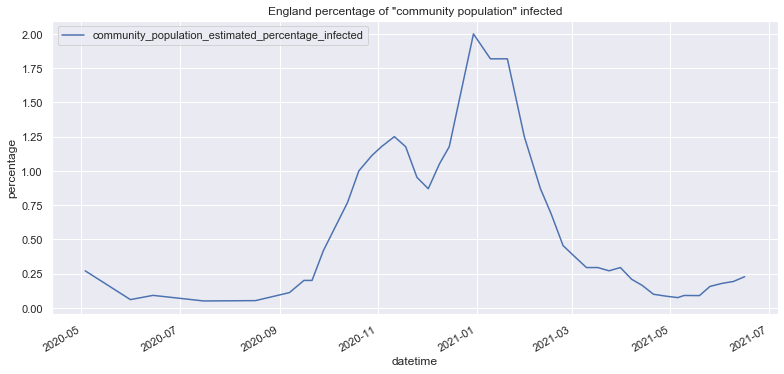

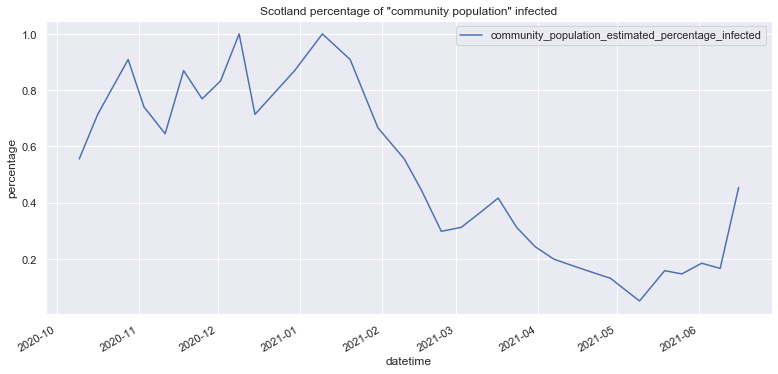

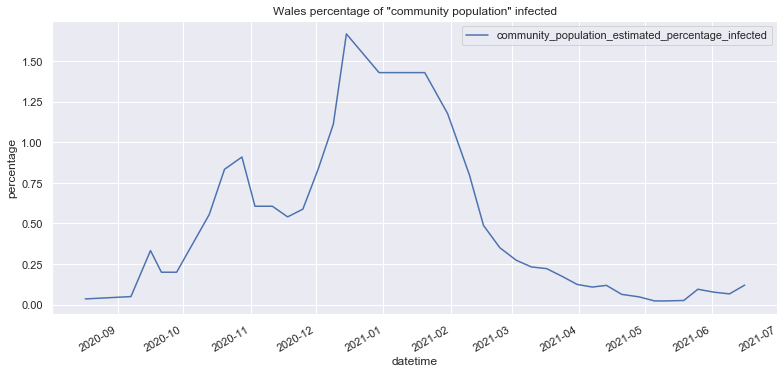

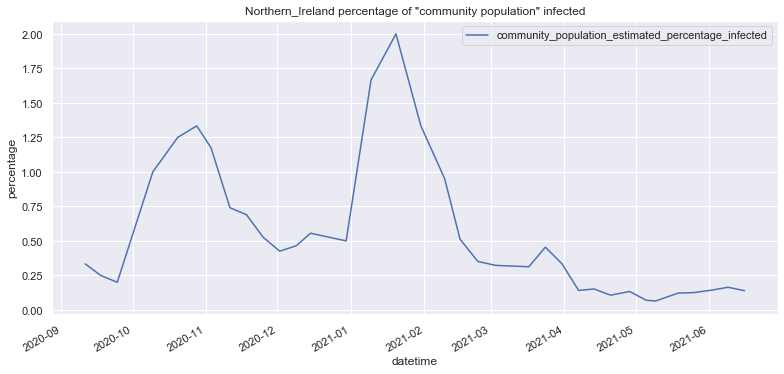

In [4]:
for region in list(set(df['region'].values)):
    # table for region
    display(df.query('region==@region'))
    # plot for region
    _df           = df.query('region==@region')
    df_plot       = _df[['community_population_estimated_percentage_infected']]
    df_plot.index = _df['datetime_mean']
    #df_plot.plot(title=region+' percentage of "community population" infected').legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('datetime'); plt.ylabel('percentage');
    df_plot.plot(title=region+' percentage of "community population" infected'); plt.xlabel('datetime'); plt.ylabel('percentage');